# Autoencoders for Images

* It can remove noise from images as it can recognize important features.

* First, recreate input images in the output.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.optimizers import SGD

encoder = Sequential([
    (Flatten(input_shape=[28,28])),
    (Dense(400,activation="relu")),
    (Dense(200,activation="relu")),
    (Dense(100,activation="relu")),
    (Dense(50,activation="relu")),
    (Dense(25,activation="relu"))  # Going down to 25 dimensions out of 784 (28*28)
])

In [6]:
decoder = Sequential([
    (Dense(50,input_shape=[25],activation='relu')),
    (Dense(100,activation='relu')),
    (Dense(200,activation='relu')),
    (Dense(400,activation='relu')),
    (Dense(28 * 28, activation="sigmoid")), # Only two possibilities, does output image match input's image
    # or not?
    (Reshape([28, 28]))  # Converting 1D data back to 2D
])

In [7]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=1.5), metrics=['accuracy'])

In [8]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2443 - accuracy: 0.0953 - val_loss: 0.2082 - val_accuracy: 0.1183
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1780 - accuracy: 0.1713 - val_loss: 0.1647 - val_accuracy: 0.1802
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1565 - accuracy: 0.2016 - val_loss: 0.1491 - val_accuracy: 0.2103
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1463 - accuracy: 0.2165 - val_loss: 0.1428 - val_accuracy: 0.2138
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1392 - accuracy: 0.2254 - val_loss: 0.1339 - val_accuracy: 0.2249


In [9]:
passed_images = autoencoder.predict(X_test[:10])

Original image


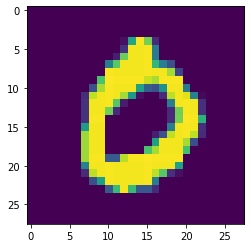

Image from the autoencoder


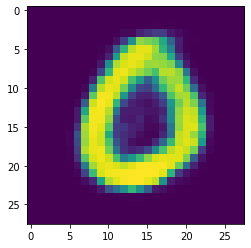

In [10]:
n = 3

print('Original image')
plt.imshow(X_test[n])
plt.show()
print('Image from the autoencoder')
plt.imshow(passed_images[n])